In [1]:
import matplotlib.pyplot as plt
import json
import gzip
import os
from statistics import quantiles
colors = ['blue', 'orange', 'green', 'red']

In [5]:
def load_stats(base_dir, num):
    stats = {}
    for i in range(num):
        with open(f'./q8_scale/{base_dir}/q8JoinStream-{i}.json') as f:
            q8_st = json.load(f)
            stats[i] = q8_st
    return stats

def plot(st_bf, st_af):
    plt.figure()
    for i in range(len(st_bf)):
        st_before = st_bf[i]['Latencies']['eventTimeLatency_sink']
        st_after = st_af[i]['Latencies']['eventTimeLatency_sink']
        qBf = quantiles(st_before, n=100)
        qAf = quantiles(st_after, n=100)
        print(f"w{i} before scale: p50 {qBf[49]} p99 {qBf[98]}, after scale: p50 {qAf[49]} p99 {qAf[98]}")
        st = st_before + st_after
        plt.plot(st, color=colors[i], label=f'q8_w{i}')
    plt.ylabel('Event time latency(ms)')
    plt.xlabel('Event sequence')
    #plt.ylim(0, 400)
    plt.legend()
    
    plt.figure()
    for i in range(len(st_bf)):
        st_before = st_bf[i]['Latencies']['eventTimeLatency_sink']
        plt.plot(st_before, color=colors[i], label=f'q8_w{i}')
    plt.ylabel('Event time latency(ms)')
    plt.xlabel('Event sequence before scale')
    #plt.ylim(0, 400)
    plt.legend()
    
    plt.figure()
    for i in range(len(st_bf)):
        st_after = st_af[i]['Latencies']['eventTimeLatency_sink']
        plt.plot(st_after, color=colors[i], label=f'q8_w{i}')
    plt.ylabel('Event time latency(ms)')
    plt.xlabel('Event sequence after scale')
    #plt.ylim(0, 400)
    plt.legend()
    
    plt.figure()
    for i in range(len(st_bf),len(st_af)):
        st = st_af[i]['Latencies']['eventTimeLatency_sink']
        qAf = quantiles(st, n=100)
        print(f"w{i} after scale: p50 {qAf[49]} p99 {qAf[98]}")
        plt.plot(st, color=colors[i], label=f'q8_w{i}')
    plt.ylabel('Event time latency(ms)')
    plt.xlabel('Event sequence')
    #plt.ylim(0, 400)
    plt.legend()

def plotRealTime(st_bf, st_af, startAt, scaleAt):
    scaleTime = scaleAt - startAt
    plt.figure()
    for i in range(2):
        st = st_bf[i]['Latencies']['eventTimeLatency_sink'] + st_af[i]['Latencies']['eventTimeLatency_sink']
        ts = st_bf[i]['EventTs'] + st_af[i]['EventTs']
        ts = [i-startAt for i in ts]
        plt.plot(ts, st, color=colors[i], label=f'worker{i}')
    plt.axvline(x=scaleTime, ls='--', color='green')
    for i in range(2,4):
        st = st_af[i]['Latencies']['eventTimeLatency_sink']
        ts = st_af[i]['EventTs']
        ts = [i-startAt for i in ts]
        plt.plot(ts, st, color=colors[i], label=f'worker{i}')
    plt.ylabel('Event time latency(ms)')
    plt.xlabel('Event sequence')
    #plt.ylim(0, 400)
    plt.legend()
    
def plotRealTimeSplit(st_bf, st_af, startAt, scaleAt, ymax):
    scaleTime = scaleAt - startAt
    fig = plt.figure(figsize=(6, 5))
    ax1 = plt.subplot(211)
    for i in range(len(st_bf)):
        st_before = st_bf[i]['Latencies']['eventTimeLatency_sink']
        qBf = quantiles(st_before, n=100)
        print(f"w{i} before scale: p50 {qBf[49]} p99 {qBf[98]}")
        ts = st_bf[i]['EventTs']
        ts = [i-startAt for i in ts]
        ax1.plot(ts, st_before, color=colors[i], label=f'worker{i}')
    fig.supylabel('Event time latency(ms)')
    # ax1.set_xlabel('Time(ms)')
    ax1.set_ylim(0, ymax)
    plt.legend()
    
    print()
    ax2 = plt.subplot(212)
    for i in range(len(st_af)):
        st_after = st_af[i]['Latencies']['eventTimeLatency_sink']
        qAf = quantiles(st_after, n=100)
        print(f"w{i} after scale: p50 {qAf[49]} p99 {qAf[98]}")
        ts = st_af[i]['EventTs']
        ts = [i-startAt for i in ts]
        ax2.plot(ts, st_after, color=colors[i], label=f'worker{i}')
    # ax2.set_ylabel('Event time latency(ms)')
    ax2.set_xlabel('Time(ms)')
    ax2.set_ylim(0, ymax)
    plt.legend()

w0 before scale: p50 120.0 p99 536.0
w1 before scale: p50 140.0 p99 1017.0

w0 after scale: p50 125.0 p99 798.0
w1 after scale: p50 128.0 p99 1485.0
w2 after scale: p50 115.0 p99 259.0
w3 after scale: p50 121.0 p99 277.0


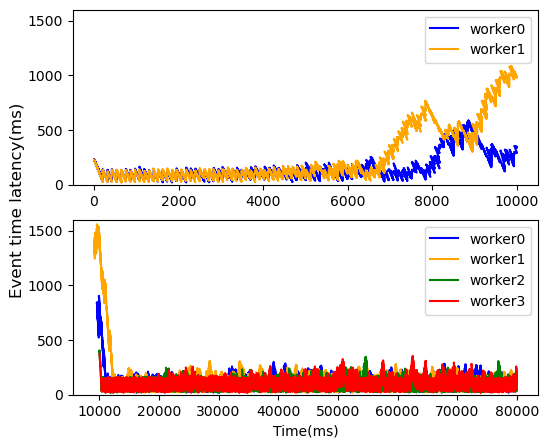

In [6]:
base_dir='10_70_7040000/0/stats/beforeScale'
st_bf = load_stats(base_dir, 2)
base_dir='10_70_7040000/0/stats/afterScale'
st_af = load_stats(base_dir, 4)
scaleAt = 1663465367608
start = 1663465357609
# plot(st_bf, st_af)
plotRealTimeSplit(st_bf, st_af, start, scaleAt, 1600)

w0 before scale: p50 105.0 p99 173.0
w1 before scale: p50 103.0 p99 174.0
w2 before scale: p50 101.0 p99 171.0
w3 before scale: p50 104.0 p99 174.0

w0 after scale: p50 105.0 p99 167.0
w1 after scale: p50 104.0 p99 167.0


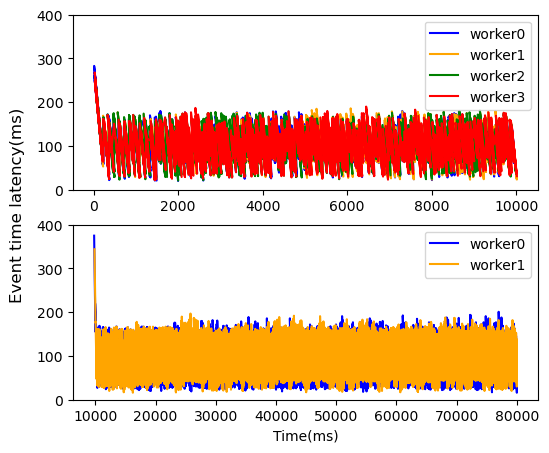

In [7]:
base_dir = '4src_scale_down_10_70_12000/0/stats/beforeScale'
st_bf = load_stats(base_dir, 4)
base_dir = '4src_scale_down_10_70_12000/0/stats/afterScale'
st_af = load_stats(base_dir, 2)
scaleAt = 1667795914714
start = 1667795904708
plotRealTimeSplit(st_bf, st_af, start, scaleAt, 400)
plt.savefig('q8_4to2_scaledown.pdf', bbox_inches='tight')

w0 before scale: p50 116.0 p99 1390.0
w1 before scale: p50 138.0 p99 1292.0

w0 after scale: p50 127.0 p99 2807.0
w1 after scale: p50 132.0 p99 2873.0
w2 after scale: p50 119.0 p99 314.0
w3 after scale: p50 123.0 p99 1022.0


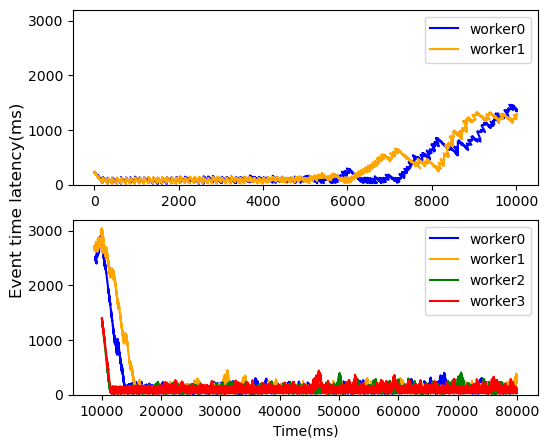

In [11]:
base_dir='10_70_24000tps/0/stats/beforeScale'
st_bf = load_stats(base_dir, 2)
base_dir='10_70_24000tps/0/stats/afterScale'
st_af = load_stats(base_dir, 4)
scaleAt = 1663529172741
start =  1663529162735
#plot(st_bf, st_af)
plotRealTimeSplit(st_bf, st_af, start, scaleAt, 3200)
#plotRealTime(st_bf, st_af, start, scaleAt)
plt.savefig('q8_2to4_scaleup.pdf', bbox_inches='tight')

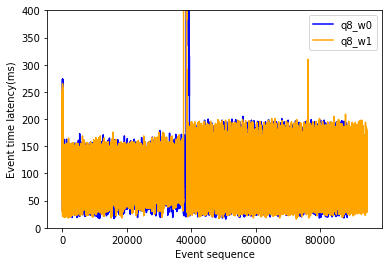

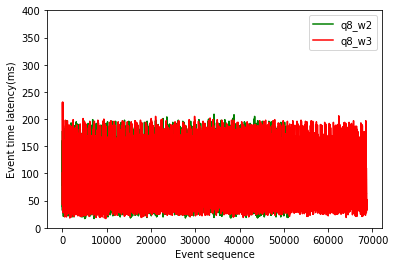

In [18]:
base_dir='20_60_4src/0/stats/beforeScale'
st_bf = load_stats(base_dir, 2)
base_dir='20_60_4src/0/stats/afterScale'
st_af = load_stats(base_dir, 4)

plt.figure()
for i in range(2):
    st = st_bf[i]['Latencies']['eventTimeLatency_sink'] + st_af[i]['Latencies']['eventTimeLatency_sink']
    plt.plot(st, color=colors[i], label=f'q8_w{i}')
plt.ylabel('Event time latency(ms)')
plt.xlabel('Event sequence')
plt.ylim(0, 400)
plt.legend()

plt.figure()
for i in range(2,4):
    st = st_af[i]['Latencies']['eventTimeLatency_sink']
    plt.plot(st, color=colors[i], label=f'q8_w{i}')
plt.ylabel('Event time latency(ms)')
plt.xlabel('Event sequence')
plt.ylim(0, 400)
plt.legend()


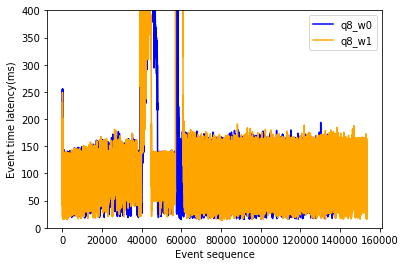

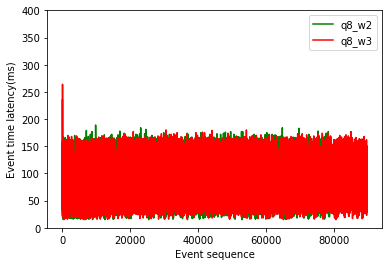

In [21]:
base_dir='20_60_3840000/0/stats/beforeScale'
st_bf = load_stats(base_dir, 2)
base_dir='20_60_3840000/0/stats/afterScale'
st_af = load_stats(base_dir, 4)

plt.figure()
for i in range(2):
    st = st_bf[i]['Latencies']['eventTimeLatency_sink'] + st_af[i]['Latencies']['eventTimeLatency_sink']
    plt.plot(st, color=colors[i], label=f'q8_w{i}')
plt.ylabel('Event time latency(ms)')
plt.xlabel('Event sequence')
plt.ylim(0, 400)
plt.legend()

plt.figure()
for i in range(2,4):
    st = st_af[i]['Latencies']['eventTimeLatency_sink']
    plt.plot(st, color=colors[i], label=f'q8_w{i}')
plt.ylabel('Event time latency(ms)')
plt.xlabel('Event sequence')
plt.ylim(0, 400)
plt.legend()


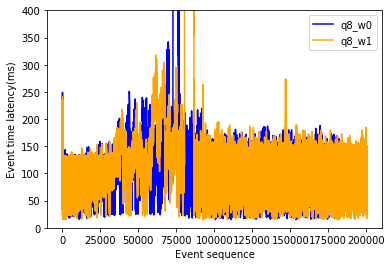

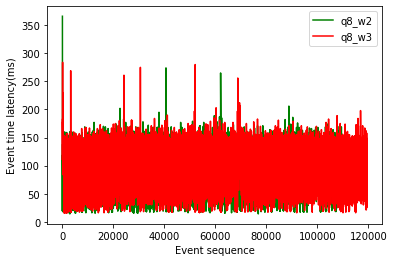

In [29]:
# 16000
base_dir='20_60_5120000/0/stats/beforeScale'
st_bf = load_stats(base_dir, 2)
base_dir='20_60_5120000/0/stats/afterScale'
st_af = load_stats(base_dir, 4)

plt.figure()
for i in range(2):
    st = st_bf[i]['Latencies']['eventTimeLatency_sink'] + st_af[i]['Latencies']['eventTimeLatency_sink']
    plt.plot(st, color=colors[i], label=f'q8_w{i}')
plt.ylabel('Event time latency(ms)')
plt.xlabel('Event sequence')
plt.ylim(0, 400)
plt.legend()

plt.figure()
for i in range(2,4):
    st = st_af[i]['Latencies']['eventTimeLatency_sink']
    plt.plot(st, color=colors[i], label=f'q8_w{i}')
plt.ylabel('Event time latency(ms)')
plt.xlabel('Event sequence')
# plt.ylim(0, 400)
plt.legend()


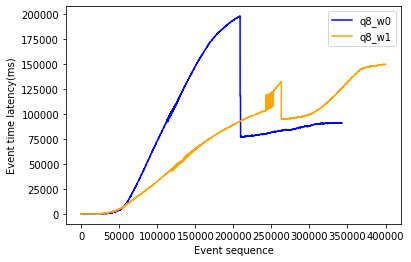

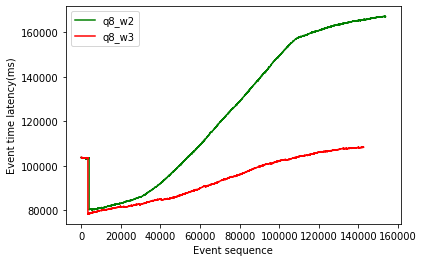

In [24]:
base_dir='20_60_15360000/0/stats/beforeScale'
st_bf = load_stats(base_dir, 2)
base_dir='20_60_15360000/0/stats/afterScale'
st_af = load_stats(base_dir, 4)

plt.figure()
for i in range(2):
    st = st_bf[i]['Latencies']['eventTimeLatency_sink'] + st_af[i]['Latencies']['eventTimeLatency_sink']
    plt.plot(st, color=colors[i], label=f'q8_w{i}')
plt.ylabel('Event time latency(ms)')
plt.xlabel('Event sequence')
# plt.ylim(0, 400)
plt.legend()

plt.figure()
for i in range(2,4):
    st = st_af[i]['Latencies']['eventTimeLatency_sink']
    plt.plot(st, color=colors[i], label=f'q8_w{i}')
plt.ylabel('Event time latency(ms)')
plt.xlabel('Event sequence')
# plt.ylim(0, 400)
plt.legend()


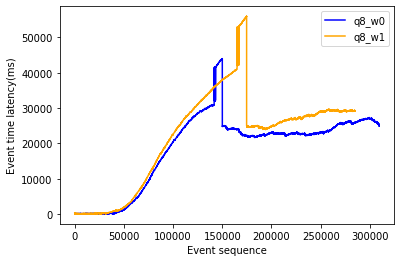

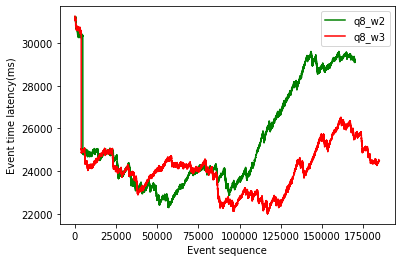

In [28]:
base_dir='20_60_10240000/0/stats/beforeScale'
st_bf = load_stats(base_dir, 2)
base_dir='20_60_10240000/0/stats/afterScale'
st_af = load_stats(base_dir, 4)
plot(st_bf, st_af)

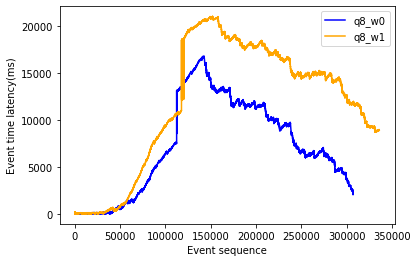

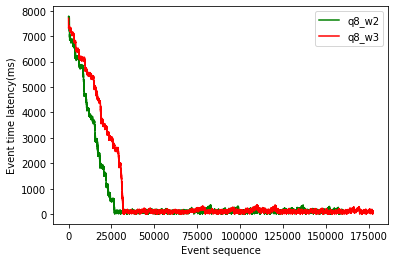

In [31]:
# 24000
base_dir='20_60_7680000/0/stats/beforeScale'
st_bf = load_stats(base_dir, 2)
base_dir='20_60_7680000/0/stats/afterScale'
st_af = load_stats(base_dir, 4)
plot(st_bf, st_af)

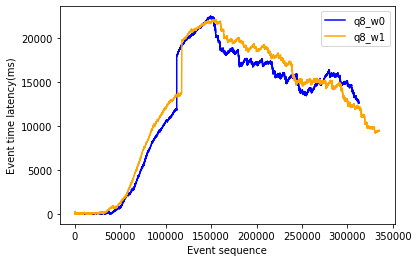

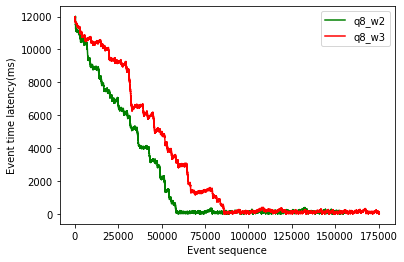

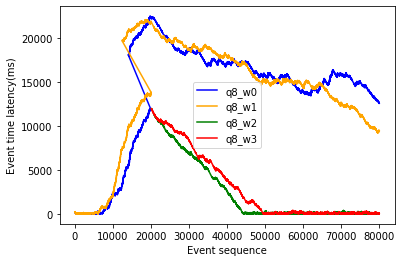

In [7]:
# 24000
base_dir='20_60_7680000/1/stats/beforeScale'
st_bf = load_stats(base_dir, 2)
base_dir='20_60_7680000/1/stats/afterScale'
st_af = load_stats(base_dir, 4)
scaleAt = 1663221815970
start = 1663221795973
plot(st_bf, st_af)
plotRealTime(st_bf, st_af, start, scaleAt)

w0 before scale: p50 106.0 p99 523.0, after scale: p50 110.0 p99 515.15
w1 before scale: p50 115.0 p99 538.0, after scale: p50 111.0 p99 597.0
w2 after scale: p50 107.0 p99 196.0
w3 after scale: p50 109.0 p99 207.0


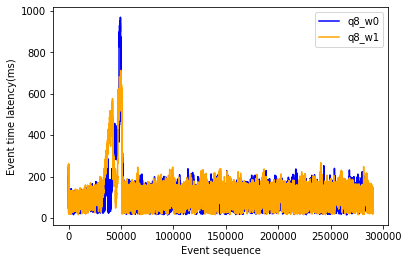

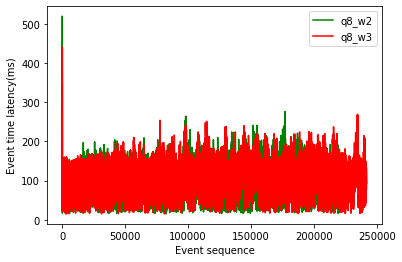

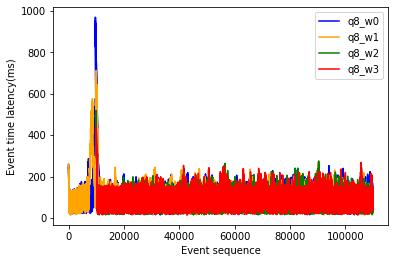

In [14]:
base_dir='10_100_20000tps/0/stats/beforeScale'
st_bf = load_stats(base_dir, 2)
base_dir='10_100_20000tps/0/stats/afterScale'
st_af = load_stats(base_dir, 4)
scaleAt = 1663450685081
start =  1663450675075
plot(st_bf, st_af)
plotRealTime(st_bf, st_af, start, scaleAt)

w0 before scale: p50 2181.0 p99 12273.0, after scale: p50 16274.0 p99 22676.0
w1 before scale: p50 2147.0 p99 12333.0, after scale: p50 18896.0 p99 22456.0
w2 after scale: p50 192.0 p99 11558.0
w3 after scale: p50 464.0 p99 11825.0


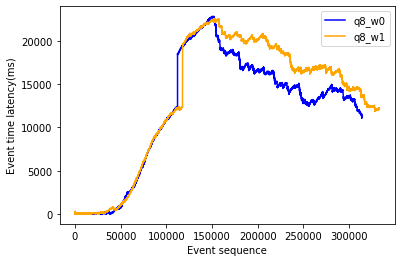

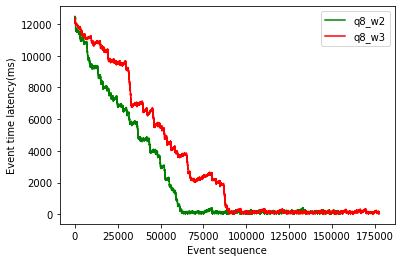

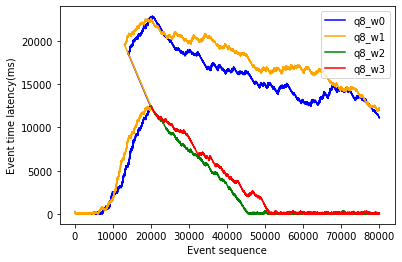

In [15]:
base_dir='20_60_7680000/2/stats/beforeScale'
st_bf = load_stats(base_dir, 2)
base_dir='20_60_7680000/2/stats/afterScale'
st_af = load_stats(base_dir, 4)
scaleAt = 1663461544234
start = 1663461524220
plot(st_bf, st_af)
plotRealTime(st_bf, st_af, start, scaleAt)

AttributeError: module 'matplotlib.pyplot' has no attribute 'subfigure'

w0 before scale: p50 22154.0 p99 60822.0, after scale: p50 26672.0 p99 31194.0
w1 before scale: p50 32212.0 p99 75856.0, after scale: p50 27448.0 p99 30879.0
w2 after scale: p50 25346.0 p99 60218.0
w3 after scale: p50 23282.0 p99 60534.0


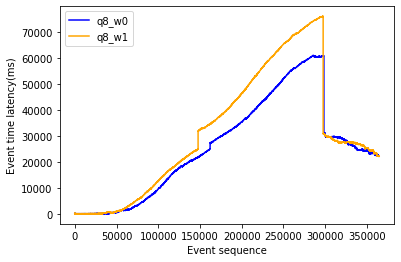

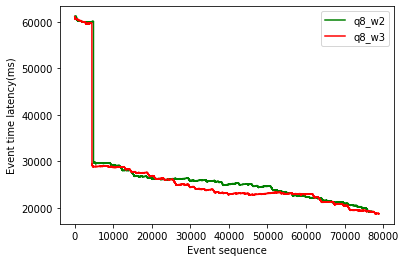

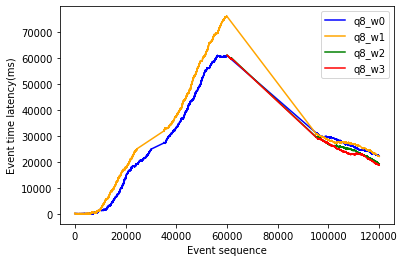

In [17]:
base_dir='60_60_11520000/0/stats/beforeScale'
st_bf = load_stats(base_dir, 2)
base_dir='60_60_11520000/0/stats/afterScale'
st_af = load_stats(base_dir, 4)
scaleAt = 1663468432904
start =  1663468372889
plot(st_bf, st_af)
plotRealTime(st_bf, st_af, start, scaleAt)

w0 before scale: p50 1703.0 p99 12947.0, after scale: p50 13897.0 p99 22543.0
w1 before scale: p50 6597.0 p99 26291.28, after scale: p50 14711.0 p99 24968.0
w2 after scale: p50 181.0 p99 12286.0
w3 after scale: p50 172.0 p99 12431.0


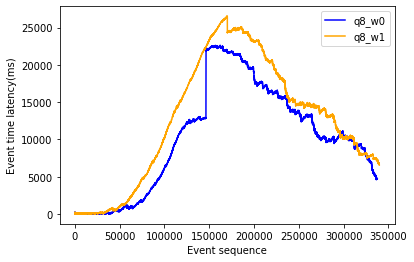

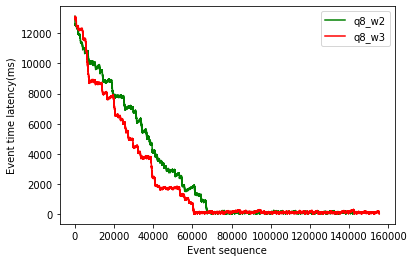

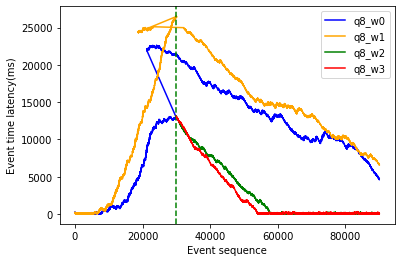

In [23]:
base_dir='30_60_22000tps/0/stats/beforeScale'
st_bf = load_stats(base_dir, 2)
base_dir='30_60_22000tps/0/stats/afterScale'
st_af = load_stats(base_dir, 4)
scaleAt =  1663520346520
start =  1663520316502
plot(st_bf, st_af)
plotRealTime(st_bf, st_af, start, scaleAt)

w0 before scale: p50 1096.0 p99 9654.0, after scale: p50 10762.0 p99 18294.0
w1 before scale: p50 5981.0 p99 23536.0, after scale: p50 18055.0 p99 23910.0
w2 after scale: p50 132.0 p99 8814.0
w3 after scale: p50 126.0 p99 9068.0


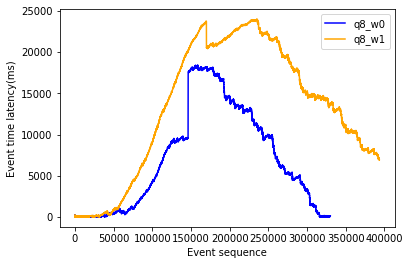

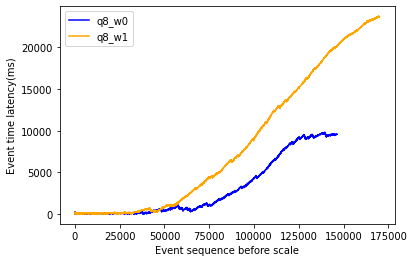

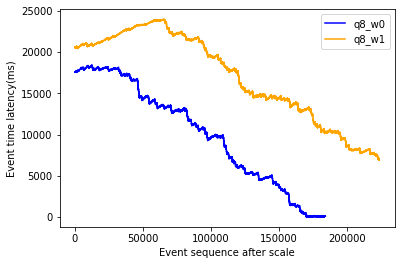

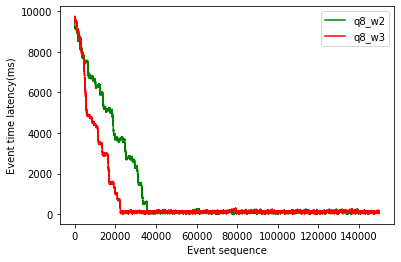

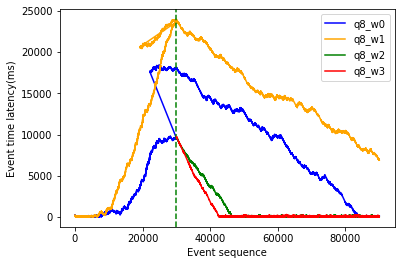

In [26]:
base_dir='30_60_22000tps/1/stats/beforeScale'
st_bf = load_stats(base_dir, 2)
base_dir='30_60_22000tps/1/stats/afterScale'
st_af = load_stats(base_dir, 4)
scaleAt =  1663520730259
start =  1663520700245
plot(st_bf, st_af)
plotRealTime(st_bf, st_af, start, scaleAt)